## Euler Rotations

In this notebook you'll explore Euler rotations and get a feel for why the order of rotations matters.

Euler rotations as we define them in this program are counterclockwise about the axes of the vehicle body frame, where:

- *Roll* - $\phi$ is about the x-axis
- *Pitch* - $\theta$ is about the y-axis
- *Yaw* - $\psi$ is about the z-axis

As you'll see the same set of rotation transformations, applied in a different order can produce a very different final result!

In [11]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from enum import Enum

%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

from sympy import Eijk, KroneckerDelta, sin, cos
#from sympy.abc import i,j#, theta
import sympy as sp
#sp.init_printing(use_unicode=True)

def Rot_AngAx(n, theta):
    """
    Rotation matrix
    Rodrigues formula
    angle-axis parametrization
    INPUT: n - vector [nx,ny,nz]
           0 <= theta <= pi
    OUTPUT: Rot - matrix(3x3)
    nx,ny,nz = symbols('nx,ny,nz')
    n = [nx,ny,nz]
    """

    dimens = 3;
    """
    R = sp.MatrixSymbol('R', dimens, dimens)
    """
    i,j = sp.symbols('i,j')
    R = sp.FunctionMatrix(dimens, dimens, sp.Lambda((i,j), 
                                                  cos(theta)*KroneckerDelta(i,j)))
    for k in range(dimens):
        R -= sp.FunctionMatrix(dimens,dimens, sp.Lambda((i,j), sin(theta) * Eijk(i,j,k) * n[k]))
        
    Rot = sp.Matrix(R)

    R2 = sp.zeros(dimens)
    for i in range(dimens):
        R2.row_op(i, lambda v,j: (1-cos(theta)) * n[i]*n[j])
    Rot += R2
    Rot = sp.N(Rot,4)
    return Rot

In [12]:
plt.rcParams["figure.figsize"] = [12, 12]

In [13]:
class Rotation(Enum):
    ROLL = 0
    PITCH = 1
    YAW = 2  


class EulerRotation:
    
    def __init__(self, rotations):
        """
        `rotations` is a list of 2-element tuples where the
        first element is the rotation kind and the second element
        is angle in degrees.
        
        Ex:
        
            [(Rotation.ROLL, 45), (Rotation.YAW, 32), (Rotation.PITCH, 55)]
            
        """
        self._rotations = rotations
        #print(rotations)
        self._rotation_map = {Rotation.ROLL : self.roll, Rotation.PITCH : self.pitch, Rotation.YAW : self.yaw}

    def roll(self, phi):
        Rot = sp.matrix2numpy(Rot_AngAx([1,0,0],phi))
        #print('roll',Rot)
        """Returns a rotation matrix along the roll axis"""
        return Rot
    
    def pitch(self, theta):
        Rot = sp.matrix2numpy(Rot_AngAx([0,1,0],theta))
        #print('pitch',Rot)
        """Returns the rotation matrix along the pitch axis"""
        return Rot

    def yaw(self, psi):
        Rot = sp.matrix2numpy(Rot_AngAx([0,0,1],psi))
        #print('yaw',Rot)
        """Returns the rotation matrix along the yaw axis"""
        return Rot

    def rotate(self):
        """Applies the rotations in sequential order"""
        t = np.eye(3,dtype = object)
        #print('eye',t)
        #print(rotations)
        for RotAngAxis in self._rotations:
            angle = np.deg2rad(RotAngAxis[1])
            axis = RotAngAxis[0]
            #print(angle,axis)
            t = np.dot(self._rotation_map[axis](angle), t)
            #print('t',t)
        return t

Below you'll form a sequence of rotations. The rotation matrix `R` is the mapping of performing the rotations in sequential order. Multiplying a vector by `R` will perform the rotations on that vector.

In [14]:
# Test your code by passing in some rotation values
rotations = [
    (Rotation.ROLL, 25),
    (Rotation.PITCH, 75),
    (Rotation.YAW, 90),
]

R = EulerRotation(rotations).rotate()
print('Rotation matrix ...')
print(R)
# Should print
# Rotation matrix ...
# [[ 0.    -0.906  0.423]
#  [ 0.259  0.408  0.875]
#  [-0.966  0.109  0.235]]

Rotation matrix ...
[[1.585e-17 -0.9063 0.4226]
 [0.2588 0.4082 0.8754]
 [-0.9659 0.1094 0.2346]]


Go back and change the order of the rotations, you should get back a rotation matrix with different values.

### Same Rotations, Different Order

Now calculate three different rotations matrices. They should stem from the same set of Euler rotations, just in differing order.

In [15]:
# TODO: calculate 3 rotation matrices.
rotations1 = [rotations[2],rotations[1],rotations[0]]
rotations2 = [rotations[2],rotations[0],rotations[1]]
rotations3 = [rotations[1],rotations[2],rotations[0]]
R1 = EulerRotation(rotations1).rotate()
#print(rotations1)
R2 = EulerRotation(rotations2).rotate()
R3 = EulerRotation(rotations3).rotate()
print(R1)
print()
print(R2)
print()
print(R3)
print()

[[1.585e-17 -0.2588 0.9659]
 [0.9063 -0.4082 -0.1094]
 [0.4226 0.8754 0.2346]]

[[0.4082 -0.2588 0.8754]
 [0.9063 5.550e-17 -0.4226]
 [0.1094 0.9659 0.2346]]

[[1.585e-17 -1.000 5.915e-17]
 [0.6428 5.550e-17 0.7660]
 [-0.7660 2.588e-17 0.6428]]



### Seeing is Believing

It's clear the three rotation matrices are different, but, in order to get an deeper understanding let's plot the impact of the rotations.

In [42]:
# unit vector along x-axis
v = np.array([1, 0, 0])

Apply the rotations to `v`. Feel free to change the values of this input vector.

In [43]:
# TODO: calculate the new rotated versions of `v`.
rv1 = np.dot(R1,v)
rv2 = np.dot(R2,v)
rv3 = np.dot(R3,v)
# rv = np.dot(R, v)

Plotting time ...

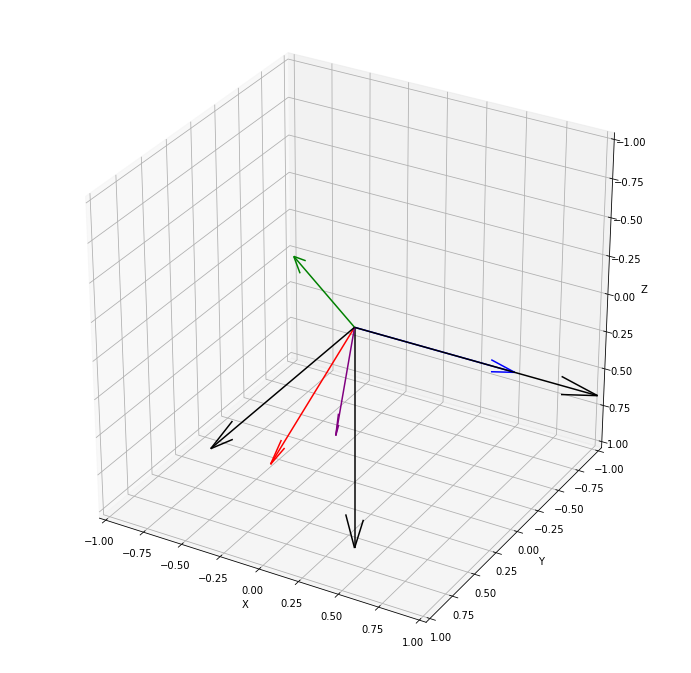

In [44]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# axes (shown in black)
ax.quiver(0, 0, 0, 1.5, 0, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 1.5, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 0, 1.5, color='black', arrow_length_ratio=0.15)


# Original Vector (shown in blue)
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='blue', arrow_length_ratio=0.15)

# Rotated Vectors (shown in red)
ax.quiver(0, 0, 0, rv1[0], rv1[1], rv1[2], color='red', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv2[0], rv2[1], rv2[2], color='purple', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv3[0], rv3[1], rv3[2], color='green', arrow_length_ratio=0.15)

ax.set_xlim3d(-1, 1)
ax.set_ylim3d(1, -1)
ax.set_zlim3d(1, -1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### Gimbal Lock
To demonstrate gimbal lock try starting a series of rotations with a pitch of +/- 90 degrees, then see what happens when you try to yaw. Try the yaw first and see what happens!

[solution](/notebooks/Rotations-Solution.ipynb)